In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_json('train.json', encoding='utf8', lines=True)
train_df.head()

,url,title,pub_time,content,entities,label
0,http://baijiahao.baidu.com/s?id=16596068669537...,胡润富豪榜中国入围者超美国+印度 这家A股公司董事长排名飞升,2020-02-26,来源：数据宝<br/>作者： 梁谦刚<br/>胡润富豪榜重磅出炉！马云实现三连冠，以3150...,"{'丸美': {'co-occurrence': ['孙怀庆'], 'entity_id':...",0
1,http://baijiahao.baidu.com/s?id=16598012780182...,陶勇医生受伤后首发声：我看过太多悲惨的命运，更能承受打击,2020-02-29,以下文章来源于南方人物周刊 ，作者梁辰<br/>南方人物周刊<br/>本文首发于南方人物周刊...,"{'结膜炎': {'co-occurrence': ['沙眼', '眼科'], 'entit...",0
2,http://baijiahao.baidu.com/s?id=16588611751034...,来自远方的祝福 海外民众用画笔、音乐为中国加油,2020-02-18,自中国受新冠肺炎影响以来，不断有华侨华人和海外民众的声援从世界各个地方传来，他们用祈祷、用画...,"{'意大利': {'co-occurrence': ['奎里纳莱宫', '罗马'], 'en...",0
3,http://baijiahao.baidu.com/s?id=16600445068167...,疫情之下，多国出现抢购风潮，都囤了啥货？,2020-03-02,近日，多国新冠肺炎确诊人数暴增。美国出现第二例新冠肺炎死亡病例，意大利新冠肺炎累计病例169...,"{'法国': {'co-occurrence': ['纽约'], 'entity_id': ...",0
4,http://baijiahao.baidu.com/s?id=16594702977336...,畅连早报｜近两万元的华为折叠屏手机来了；水滴高管一致降薪20%……,2020-02-25,今日科技新闻导读1.华为发布最新折叠机MateXs2.顺丰2019年营收超千亿元3.三星证实...,"{'人民币': {'co-occurrence': ['A股', '腾讯', '华为'], ...",0


In [3]:
val_df = pd.read_json('val.unlabel.json', encoding='utf8', lines=True)
val_df.head()

,url,title,pub_time,content,entities
0,http://baijiahao.baidu.com/s?id=16559793623729...,经观头条｜国际资本“哄抢”中国房企债 地产商久旱逢甘霖10天发债近千亿,2020-01-17,来源：经济观察报<br/>经济观察报 记者 陈博 田国宝2020年开年后两周内，中国的房地产...,"{'长正': {'co-occurrence': ['中国'], 'entity_id': ..."
1,http://baijiahao.baidu.com/s?id=16399827558612...,清朝宫廷内的“吃”有多讲究？活生生将吃转换为一种艺术,2019-07-25,作为中国历史上最后一个封建王朝，清朝在很多方面可谓是包容前朝之长，尤其是在艺术方面达到了巅峰...,"{'满族': {'co-occurrence': ['慈禧', '溥仪', '清', '乾隆..."
2,http://baijiahao.baidu.com/s?id=16489883145032...,实力明显占优的德国，二战时为何会输掉“不列颠空战”,2019-11-01,1939年9月1日，纳粹德国横扫欧洲大陆，势如破竹，锐不可当，整个西欧仅剩英国苦苦支撑。19...,"{'英国': {'co-occurrence': ['伦敦', '休·道丁', '二战', ..."
3,http://baijiahao.baidu.com/s?id=16311925308553...,入华十五载终“折戟”，亚马逊输给了谁？,2019-04-18,今日下午三点亚马逊中国官方确认，将停止为亚马逊中国网站上的第三方卖家提供卖家服务！至此，入华...,"{'英国': {'co-occurrence': ['路透社', '中国'], 'entit..."
4,http://baijiahao.baidu.com/s?id=16547079275582...,区块链50指数高歌猛进B面：40%成分股正研发业务 场景应用仍在摸索,2020-01-03,时代周报记者：李静<br/>3293.01点，涨0.59%。2020年1月3日，区块链50（...,"{'王娟': {'co-occurrence': ['李静'], 'entity_id': ..."


In [4]:
test_df = pd.read_json('test.unlabel.json', encoding='utf8', lines=True)
test_df.head()

,url,title,pub_time,content,entities
0,http://baijiahao.baidu.com/s?id=16559608204482...,探火星、落月球、空间站……中国航天将迎来“超级2020”,2020-01-17,新闻发布会现场 澎湃新闻记者 谢瑞强 图<br/>2019年，在102枚火箭、492个航天器...,"{'美国': {'co-occurrence': ['火星探测器', '火星探测'], 'e..."
1,http://baijiahao.baidu.com/s?id=16573499061115...,苏军在41年6月23日的坦克大战中，是因何失败的？都有什么原因？,2020-02-02,在德军对苏联发动进攻以后，苏军方面签发了第三号指令，命令西南方面军实施反突击行动，这次行动所...,"{'法国战役': {'co-occurrence': ['第二次世界大战', '波兰', '..."
2,http://baijiahao.baidu.com/s?id=16548970266596...,雷军集齐手机业大佬！网友戏称组建复仇者联盟 要跟华为“开干”了？,2020-01-05,2020年开年，小米就赚足眼球。先将联想的业界“万磁王”常程收归麾下，又吸引小辣椒创始人王晓...,"{'联想': {'co-occurrence': ['小米', '联想集团', '北京'],..."
3,http://baijiahao.baidu.com/s?id=16590281547606...,两犬之间——“那些熟悉而又陌生的星”系列之十一,2020-02-20,周一 · 知古通今 | 周二 · 牧夫专栏<br/>周三 · 太空探索 |周四 · 观测...,"{'冬季大三角': {'co-occurrence': ['天狼星', '参宿四', '大犬..."
4,http://baijiahao.baidu.com/s?id=16600579460628...,《红楼梦》｜从贾演贾源到宁国公和荣国公，蕴含在名称里的深意,2020-03-02,如果仅从语言文字的角度走进《红楼梦》，会发现其中有无穷的趣味，同时感叹传统文化的博大精深，光...,"{'尤氏': {'co-occurrence': ['贾代善', '贾琏', '王夫人', ..."


In [5]:
#----------------特征工程----------------
#将Topic(Label)编码
train_df['label'], lbl = pd.factorize(train_df['label'])

#将论文的标题与摘要组合为 text 特征
train_df['title'] = train_df['title'].apply(lambda x: x.strip())
train_df['content'] = train_df['content'].fillna('').apply(lambda x: x.strip())
train_df['text'] = train_df['title'] + '[SEP]' + train_df['content']
train_df['text'] = train_df['text'].str.lower()

test_df['title'] = test_df['title'].apply(lambda x: x.strip())
test_df['content'] = test_df['content'].fillna('').apply(lambda x: x.strip())
test_df['text'] = test_df['title'].str.lower() + '[SEP]' + test_df['content'].str.lower()
# test_df['text'] = test_df['text']

In [6]:
for i in range(train_df.shape[0]):
    train_df['text'].iloc[i] = train_df['text'].iloc[i].replace('  ', '').replace('\n', ' ').replace('<br/>', ' ').replace("《", " ").replace("》", " ").replace("？", " ").replace("【", "").replace("】", "")
train_df.to_csv('train.tsv', encoding='utf8', sep='\t', index=None)

C:\Users\lzc98\AppData\Local\Temp\ipykernel_23432\3880005995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'].iloc[i] = train_df['text'].iloc[i].replace('  ', '').replace('\n', ' ').replace('<br/>', ' ').replace("《", " ").replace("》", " ").replace("？", " ").replace("【", "").replace("】", "")


In [7]:
for i in range(test_df.shape[0]):
    test_df['text'].iloc[i] = test_df['text'].iloc[i].replace('  ', '').replace('\n', ' ').replace('<br/>', ' ').replace("《", " ").replace("》", " ").replace("？", " ").replace("【", "").replace("】", "")
train_df.to_csv('train.tsv', encoding='utf8', sep='\t', index=None)

C:\Users\lzc98\AppData\Local\Temp\ipykernel_23432\2707667876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['text'].iloc[i] = test_df['text'].iloc[i].replace('  ', '').replace('\n', ' ').replace('<br/>', ' ').replace("《", " ").replace("》", " ").replace("？", " ").replace("【", "").replace("】", "")


In [8]:
train_df['text']

0       胡润富豪榜中国入围者超美国+印度 这家a股公司董事长排名飞升[sep]来源：数据宝 作者： ...
1       陶勇医生受伤后首发声：我看过太多悲惨的命运，更能承受打击[sep]以下文章来源于南方人物周刊...
2       来自远方的祝福 海外民众用画笔、音乐为中国加油[sep]自中国受新冠肺炎影响以来，不断有华侨...
3       疫情之下，多国出现抢购风潮，都囤了啥货 [sep]近日，多国新冠肺炎确诊人数暴增。美国出现第...
4       畅连早报｜近两万元的华为折叠屏手机来了；水滴高管一致降薪20%……[sep]今日科技新闻导读...
                              ...                        
7830    野蛮生长的美团，距阿里、腾讯和头条还有多远[sep]文|编程浪子 来源|智能相对论（aixd...
7831    新冠病毒、伊朗雪崩、澳洲大火：枪响之后，没有赢家[sep]#新型冠状病毒# 2020年是庚子...
7832    当赌城遇上中关村 很多中国创业公司也有出海淘金梦[sep]每经记者：刘春山 王晶 余佩颖每经...
7833    谁把总统拉下马  水门事件 背后的美国政坛风云录[sep]在新闻界，一旦有比较特殊的热点事件...
7834    沪镍 等待中长线多单布局机会[sep]来源：期货日报网 近期，镍市基本面依旧疲弱，海外疫情蔓...
Name: text, Length: 7835, dtype: object

C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

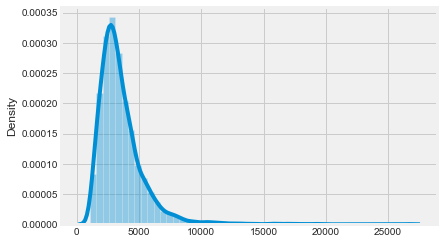

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

texts = np.asarray(train_df.iloc[:, -1:]).transpose().tolist()[0]

length_text = [len(t) for t in texts]

plt.style.use('fivethirtyeight')
sns.distplot(length_text)

C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

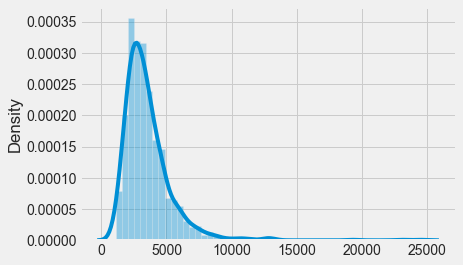

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

texts = np.asarray(test_df.iloc[:, -1:]).transpose().tolist()[0]

length_text = [len(t) for t in texts]

plt.style.use('fivethirtyeight')
sns.distplot(length_text)

In [11]:
train_out = pd.concat([train_df.drop(['url', 'title', 'pub_time', 'content', 'entities'], axis=1), train_df.iloc[:, -3:-2]], axis=1)
train_out.to_csv('output/train.tsv', encoding='utf8', sep='\t', index=None)
train_out

,label,text,entities
0,0,胡润富豪榜中国入围者超美国+印度 这家a股公司董事长排名飞升[sep]来源：数据宝 作者： ...,"{'丸美': {'co-occurrence': ['孙怀庆'], 'entity_id':..."
1,0,陶勇医生受伤后首发声：我看过太多悲惨的命运，更能承受打击[sep]以下文章来源于南方人物周刊...,"{'结膜炎': {'co-occurrence': ['沙眼', '眼科'], 'entit..."
2,0,来自远方的祝福 海外民众用画笔、音乐为中国加油[sep]自中国受新冠肺炎影响以来，不断有华侨...,"{'意大利': {'co-occurrence': ['奎里纳莱宫', '罗马'], 'en..."
3,0,疫情之下，多国出现抢购风潮，都囤了啥货 [sep]近日，多国新冠肺炎确诊人数暴增。美国出现第...,"{'法国': {'co-occurrence': ['纽约'], 'entity_id': ..."
4,0,畅连早报｜近两万元的华为折叠屏手机来了；水滴高管一致降薪20%……[sep]今日科技新闻导读...,"{'人民币': {'co-occurrence': ['A股', '腾讯', '华为'], ..."
...,...,...,...
7830,0,野蛮生长的美团，距阿里、腾讯和头条还有多远[sep]文|编程浪子 来源|智能相对论（aixd...,"{'余额宝': {'co-occurrence': ['北京', '上海', '互联网金融'..."
7831,0,新冠病毒、伊朗雪崩、澳洲大火：枪响之后，没有赢家[sep]#新型冠状病毒# 2020年是庚子...,"{'家畜': {'co-occurrence': ['人类'], 'entity_id': ..."
7832,1,当赌城遇上中关村 很多中国创业公司也有出海淘金梦[sep]每经记者：刘春山 王晶 余佩颖每经...,"{'三国': {'co-occurrence': ['美国', '日本'], 'entity..."
7833,1,谁把总统拉下马 水门事件 背后的美国政坛风云录[sep]在新闻界，一旦有比较特殊的热点事件...,"{'水门大厦': {'co-occurrence': ['美国', '水门事件'], 'en..."


In [13]:
test_out = pd.concat([test_df.drop(['url', 'title', 'pub_time', 'content', 'entities'], axis=1), test_df.iloc[:, -2:-1]], axis=1)
test_out.to_csv('output/test.tsv', encoding='utf8', sep='\t', index=None)
test_out

,text,entities
0,探火星、落月球、空间站……中国航天将迎来“超级2020”[SEP]新闻发布会现场 澎湃新闻记...,"{'美国': {'co-occurrence': ['火星探测器', '火星探测'], 'e..."
1,苏军在41年6月23日的坦克大战中，是因何失败的 都有什么原因 [SEP]在德军对苏联发动进...,"{'法国战役': {'co-occurrence': ['第二次世界大战', '波兰', '..."
2,雷军集齐手机业大佬！网友戏称组建复仇者联盟 要跟华为“开干”了 [SEP]2020年开年，小...,"{'联想': {'co-occurrence': ['小米', '联想集团', '北京'],..."
3,两犬之间——“那些熟悉而又陌生的星”系列之十一[SEP]周一 · 知古通今 | 周二 · 牧...,"{'冬季大三角': {'co-occurrence': ['天狼星', '参宿四', '大犬..."
4,红楼梦 ｜从贾演贾源到宁国公和荣国公，蕴含在名称里的深意[SEP]如果仅从语言文字的角度走...,"{'尤氏': {'co-occurrence': ['贾代善', '贾琏', '王夫人', ..."
...,...,...
1101,开工第一天 老板们在忙些啥 [SEP]每经记者：李卓 张晓庆 许恋恋 于垚峰 赵雯琪 夏冰 ...,"{'格兰仕': {'co-occurrence': ['梁昭贤', '广东'], 'enti..."
1102,每经20点丨中国外交部：强烈谴责美有关限制措施；新加坡5日起禁止韩、伊、意北部旅客入境；湖北...,"{'阳日镇': {'co-occurrence': ['湖北省'], 'entity_id'..."
1103,1月16日早报（周四）[SEP]一、1月16日早间新闻精选 宏观新闻： 1、刘鹤同特朗普正式...,"{'珠海': {'co-occurrence': ['人民币'], 'entity_id':..."
1104,中小企业“抗疫”：安全放第一；创业者总得乐观一些｜棱镜[SEP]作者 | 李伟 江晓川 许文...,"{'房产税': {'co-occurrence': ['重庆', '上海'], 'entit..."


C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

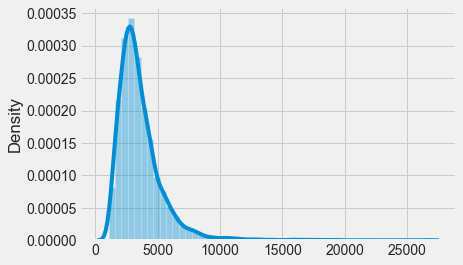

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

texts = np.asarray(train_out.iloc[:, 1:]).transpose().tolist()[0]

length_text = [len(t) for t in texts]

plt.style.use('fivethirtyeight')
sns.distplot(length_text)

C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

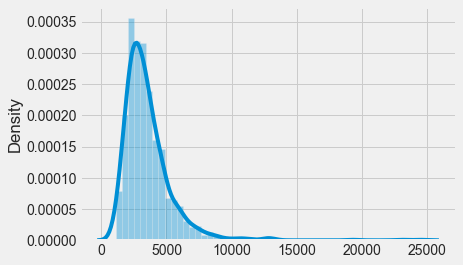

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

texts = np.asarray(test_df.iloc[:, -1:]).transpose().tolist()[0]

length_text = [len(t) for t in texts]

plt.style.use('fivethirtyeight')
sns.distplot(length_text)

# 实体个数统计

C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(['[SEP]丸美[SEP]马云[SEP]胡润研究院[SEP]王卫[SEP]钟南山[SEP]范红卫[SEP]胡润[SEP]恒大[SEP]日本[SEP]中国医学科学院[SEP]孙飘扬[SEP]韦尔[SEP]阿里巴巴[SEP]英国[SEP]腾讯[SEP]北京[SEP]国际货币基金[SEP]上海[SEP]胡润全球富豪榜[SEP]福莱特[SEP]A股[SEP]人民币[SEP]纽约[SEP]美国[SEP]马化腾[SEP]恒瑞医药[SEP]海底捞[SEP]张勇[SEP]恒力集团[SEP]孙怀庆[SEP]伦敦',
  '[SEP]结膜炎[SEP]北京市[SEP]眼外伤[SEP]SCI[SEP]白血病[SEP]科学引文索引[SEP]艾滋病[SEP]恶性肿瘤[SEP]眼科[SEP]北京[SEP]高血压[SEP]沙眼[SEP]病毒感染[SEP]葡萄膜炎[SEP]北京朝阳医院[SEP]颅脑外伤[SEP]澎湃新闻[SEP]结石[SEP]外科[SEP]并发症[SEP]美国[SEP]陶勇[SEP]APP[SEP]颅内血肿[SEP]糖尿病[SEP]感染性眼病',
  '[SEP]意大利[SEP]新西兰[SEP]巴拿马[SEP]巴伦苏埃拉[SEP]日本[SEP]玻利维亚[SEP]哥伦比亚[SEP]圣何塞省[SEP]雷拉[SEP]毛利语[SEP]惠灵顿[SEP]罗马[SEP]巴拿马城[SEP]拉巴斯[SEP]武汉[SEP]东京[SEP]墨西哥[SEP]雅典卫城[SEP]墨西哥城[SEP]波哥大[SEP]希腊[SEP]哥斯达黎加[SEP]奎里纳莱宫[SEP]总统府[SEP]中国',
  '[SEP]法国[SEP]米兰[SEP]熊本市[SEP]华尔街[SEP]水户市[SEP]意大利[SEP]克雷莫纳[SEP]孔特[SEP]谭德塞[SEP]雷德菲尔德[SEP]日本[SEP]韩国[SEP]日本放送协会[SEP]新天地[SEP]NHK[SEP]西班牙[SEP]里亚尔[SEP]北海道[SEP]新天地教会[SEP]厄瓜多尔[SEP]阿塞拜疆[SEP]世界卫生组织[SEP]纽约大学[SEP]李万熙[SEP]茨城县[SEP]联合国[SEP]纽约[SEP]美国[SEP]希腊[SEP]伊朗[SEP]CNN',
  '[SEP]人民币[SEP]蔚来[SEP]李斌[SEP]三星[SEP]湖北[SEP]湖北省[SEP]华为[

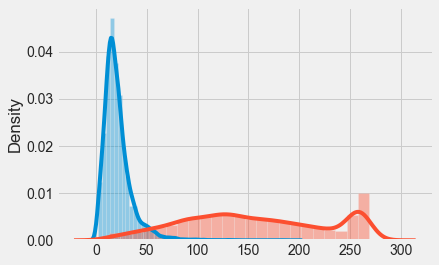

In [16]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

train_entity_nums = []
train_entities = []

for i in range(train_df['entities'].shape[0]):
    cnt = 0
    entities = ""
    for key, value in train_df['entities'][i].items():
        # print(key, '=>', value)
        cnt += 1
        if len(entities) >= 256:
            continue
        entities += "[SEP]" + key
    train_entities.append(entities)
    train_entity_nums.append(cnt)

entity_lengths = [len(e) for e in train_entities]

train_entities, train_entity_nums, sns.distplot(train_entity_nums), sns.distplot(entity_lengths)

In [17]:
train_entity_nums_df = pd.DataFrame({"entity_nums": train_entity_nums})
train_entity_nums_df

,entity_nums
0,31
1,26
2,25
3,31
4,14
...,...
7830,6
7831,18
7832,33
7833,18


In [18]:
train = pd.concat([train_out, train_entity_nums_df], axis=1).drop(['entities'], axis=1)
train.to_csv('output/train.tsv', encoding='utf8', sep='\t', index=None)
train

,label,text,entity_nums
0,0,胡润富豪榜中国入围者超美国+印度 这家a股公司董事长排名飞升[sep]来源：数据宝 作者： ...,31
1,0,陶勇医生受伤后首发声：我看过太多悲惨的命运，更能承受打击[sep]以下文章来源于南方人物周刊...,26
2,0,来自远方的祝福 海外民众用画笔、音乐为中国加油[sep]自中国受新冠肺炎影响以来，不断有华侨...,25
3,0,疫情之下，多国出现抢购风潮，都囤了啥货 [sep]近日，多国新冠肺炎确诊人数暴增。美国出现第...,31
4,0,畅连早报｜近两万元的华为折叠屏手机来了；水滴高管一致降薪20%……[sep]今日科技新闻导读...,14
...,...,...,...
7830,0,野蛮生长的美团，距阿里、腾讯和头条还有多远[sep]文|编程浪子 来源|智能相对论（aixd...,6
7831,0,新冠病毒、伊朗雪崩、澳洲大火：枪响之后，没有赢家[sep]#新型冠状病毒# 2020年是庚子...,18
7832,1,当赌城遇上中关村 很多中国创业公司也有出海淘金梦[sep]每经记者：刘春山 王晶 余佩颖每经...,33
7833,1,谁把总统拉下马 水门事件 背后的美国政坛风云录[sep]在新闻界，一旦有比较特殊的热点事件...,18


In [19]:
for i in range(train.shape[0]):
    train['text'].iloc[i] = train['text'].iloc[i][:256] + train_entities[i]

train.to_csv('output/train.tsv', encoding='utf8', sep='\t', index=None)
train

C:\Users\lzc98\AppData\Local\Temp\ipykernel_23432\763353270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text'].iloc[i] = train['text'].iloc[i][:256] + train_entities[i]


,label,text,entity_nums
0,0,胡润富豪榜中国入围者超美国+印度 这家a股公司董事长排名飞升[sep]来源：数据宝 作者： ...,31
1,0,陶勇医生受伤后首发声：我看过太多悲惨的命运，更能承受打击[sep]以下文章来源于南方人物周刊...,26
2,0,来自远方的祝福 海外民众用画笔、音乐为中国加油[sep]自中国受新冠肺炎影响以来，不断有华侨...,25
3,0,疫情之下，多国出现抢购风潮，都囤了啥货 [sep]近日，多国新冠肺炎确诊人数暴增。美国出现第...,31
4,0,畅连早报｜近两万元的华为折叠屏手机来了；水滴高管一致降薪20%……[sep]今日科技新闻导读...,14
...,...,...,...
7830,0,野蛮生长的美团，距阿里、腾讯和头条还有多远[sep]文|编程浪子 来源|智能相对论（aixd...,6
7831,0,新冠病毒、伊朗雪崩、澳洲大火：枪响之后，没有赢家[sep]#新型冠状病毒# 2020年是庚子...,18
7832,1,当赌城遇上中关村 很多中国创业公司也有出海淘金梦[sep]每经记者：刘春山 王晶 余佩颖每经...,33
7833,1,谁把总统拉下马 水门事件 背后的美国政坛风云录[sep]在新闻界，一旦有比较特殊的热点事件...,18


In [20]:
train_for_pretraining = train.drop(['label', 'entity_nums'], axis=1)
train_for_pretraining.to_csv('output/data_for_pretraining/train.tsv', encoding='utf8', index=None)
train_for_pretraining

,text
0,胡润富豪榜中国入围者超美国+印度 这家a股公司董事长排名飞升[sep]来源：数据宝 作者： ...
1,陶勇医生受伤后首发声：我看过太多悲惨的命运，更能承受打击[sep]以下文章来源于南方人物周刊...
2,来自远方的祝福 海外民众用画笔、音乐为中国加油[sep]自中国受新冠肺炎影响以来，不断有华侨...
3,疫情之下，多国出现抢购风潮，都囤了啥货 [sep]近日，多国新冠肺炎确诊人数暴增。美国出现第...
4,畅连早报｜近两万元的华为折叠屏手机来了；水滴高管一致降薪20%……[sep]今日科技新闻导读...
...,...
7830,野蛮生长的美团，距阿里、腾讯和头条还有多远[sep]文|编程浪子 来源|智能相对论（aixd...
7831,新冠病毒、伊朗雪崩、澳洲大火：枪响之后，没有赢家[sep]#新型冠状病毒# 2020年是庚子...
7832,当赌城遇上中关村 很多中国创业公司也有出海淘金梦[sep]每经记者：刘春山 王晶 余佩颖每经...
7833,谁把总统拉下马 水门事件 背后的美国政坛风云录[sep]在新闻界，一旦有比较特殊的热点事件...


C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\envs\pytorch39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(['[SEP]美国[SEP]嫦娥五号探测器[SEP]长征五号系列运载火箭[SEP]火星探测[SEP]APP[SEP]长征五号火箭[SEP]火星探测器[SEP]长征五号运载火箭[SEP]嫦娥四号探测器[SEP]嫦娥五号[SEP]长征六号[SEP]澎湃新闻[SEP]航天科技[SEP]嫦娥四号[SEP]长征五号B[SEP]长征五号',
  '[SEP]法国战役[SEP]法西斯[SEP]克拉科夫[SEP]波兰[SEP]德国[SEP]克莱斯勒[SEP]德军[SEP]苏军总参谋部[SEP]第聂伯河[SEP]苏联[SEP]基辅[SEP]T-34[SEP]西南方面军[SEP]第二次世界大战[SEP]沃伦[SEP]KV-1[SEP]基辅战役',
  '[SEP]联想[SEP]北京[SEP]Redmi[SEP]林斌[SEP]卢伟冰[SEP]常程[SEP]联想集团[SEP]OPPO[SEP]万磁王[SEP]小米[SEP]王晓雁[SEP]小米手机[SEP]复仇者联盟[SEP]雷军[SEP]网络制式[SEP]金立[SEP]大陆[SEP]小辣椒手机',
  '[SEP]冬季大三角[SEP]银河[SEP]三星[SEP]Sirius[SEP]南河三[SEP]鲁坦星[SEP]视星等[SEP]大犬座[SEP]天王星[SEP]参宿四[SEP]麒麟座[SEP]疏散星团[SEP]猎户座[SEP]天狼星[SEP]白矮星[SEP]三星系统[SEP]M50[SEP]Star[SEP]梅西耶天体[SEP]小犬座[SEP]伴星[SEP]红矮星',
  '[SEP]尤氏[SEP]贾敬[SEP]贾赦[SEP]林黛玉[SEP]贾代化[SEP]贾代善[SEP]贾演[SEP]北静王[SEP]刘姥姥[SEP]软烟罗[SEP]贾琏[SEP]荣国府[SEP]贾敏[SEP]贾蓉[SEP]荣国公[SEP]冷子兴[SEP]王夫人[SEP]贾母[SEP]天恩祖德[SEP]贾源[SEP]贾芸[SEP]宝玉[SEP]宁荣[SEP]甄士隐[SEP]贾珍[SEP]贾政[SEP]薛姨妈[SEP]《红楼梦》',
  '[SEP]菖蒲节[SEP]越王勾践[SEP]五代十国[SEP]浙江[SEP]板栗[SEP]湖北[SEP]蟾蜍[SEP]伍子胥[SEP]柏叶[SEP]马援[SEP]午节[SEP]楚国[SEP]阳燧[SEP]龙日节[SEP]湖南[SEP]石

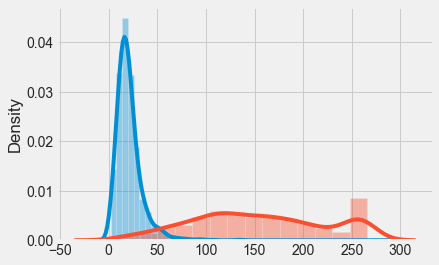

In [21]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

test_entity_nums = []
test_entities = []

for i in range(test_df['entities'].shape[0]):
    cnt = 0
    entities = ""
    for key, value in test_df['entities'][i].items():
        # print(key, '=>', value)
        cnt += 1
        if len(entities) >= 256:
            continue
        entities += "[SEP]" + key
    test_entities.append(entities)
    test_entity_nums.append(cnt)

entity_lengths = [len(e) for e in test_entities]

test_entities, test_entity_nums, sns.distplot(test_entity_nums), sns.distplot(entity_lengths)

In [22]:
test_entity_nums_df = pd.DataFrame({"entity_nums": test_entity_nums})
test_entity_nums_df

,entity_nums
0,16
1,17
2,18
3,22
4,28
...,...
1101,17
1102,14
1103,22
1104,21


In [23]:
test = pd.concat([test_out, test_entity_nums_df], axis=1).drop(['entities'], axis=1)
test.to_csv('output/test.tsv', encoding='utf8', sep='\t', index=None)
test

,text,entity_nums
0,探火星、落月球、空间站……中国航天将迎来“超级2020”[SEP]新闻发布会现场 澎湃新闻记...,16
1,苏军在41年6月23日的坦克大战中，是因何失败的 都有什么原因 [SEP]在德军对苏联发动进...,17
2,雷军集齐手机业大佬！网友戏称组建复仇者联盟 要跟华为“开干”了 [SEP]2020年开年，小...,18
3,两犬之间——“那些熟悉而又陌生的星”系列之十一[SEP]周一 · 知古通今 | 周二 · 牧...,22
4,红楼梦 ｜从贾演贾源到宁国公和荣国公，蕴含在名称里的深意[SEP]如果仅从语言文字的角度走...,28
...,...,...
1101,开工第一天 老板们在忙些啥 [SEP]每经记者：李卓 张晓庆 许恋恋 于垚峰 赵雯琪 夏冰 ...,17
1102,每经20点丨中国外交部：强烈谴责美有关限制措施；新加坡5日起禁止韩、伊、意北部旅客入境；湖北...,14
1103,1月16日早报（周四）[SEP]一、1月16日早间新闻精选 宏观新闻： 1、刘鹤同特朗普正式...,22
1104,中小企业“抗疫”：安全放第一；创业者总得乐观一些｜棱镜[SEP]作者 | 李伟 江晓川 许文...,21


In [24]:
for i in range(test.shape[0]):
    test['text'].iloc[i] = test['text'].iloc[i][:256] + test_entities[i]

test.to_csv('output/test.tsv', encoding='utf8', sep='\t', index=None)
test

C:\Users\lzc98\AppData\Local\Temp\ipykernel_23432\1144387537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['text'].iloc[i] = test['text'].iloc[i][:256] + test_entities[i]


,text,entity_nums
0,探火星、落月球、空间站……中国航天将迎来“超级2020”[SEP]新闻发布会现场 澎湃新闻记...,16
1,苏军在41年6月23日的坦克大战中，是因何失败的 都有什么原因 [SEP]在德军对苏联发动进...,17
2,雷军集齐手机业大佬！网友戏称组建复仇者联盟 要跟华为“开干”了 [SEP]2020年开年，小...,18
3,两犬之间——“那些熟悉而又陌生的星”系列之十一[SEP]周一 · 知古通今 | 周二 · 牧...,22
4,红楼梦 ｜从贾演贾源到宁国公和荣国公，蕴含在名称里的深意[SEP]如果仅从语言文字的角度走...,28
...,...,...
1101,开工第一天 老板们在忙些啥 [SEP]每经记者：李卓 张晓庆 许恋恋 于垚峰 赵雯琪 夏冰 ...,17
1102,每经20点丨中国外交部：强烈谴责美有关限制措施；新加坡5日起禁止韩、伊、意北部旅客入境；湖北...,14
1103,1月16日早报（周四）[SEP]一、1月16日早间新闻精选 宏观新闻： 1、刘鹤同特朗普正式...,22
1104,中小企业“抗疫”：安全放第一；创业者总得乐观一些｜棱镜[SEP]作者 | 李伟 江晓川 许文...,21


In [25]:
test_for_pretraining = test.drop(['entity_nums'], axis=1)
test_for_pretraining.to_csv('output/data_for_pretraining/test.tsv', encoding='utf8', index=None)
test_for_pretraining

,text
0,探火星、落月球、空间站……中国航天将迎来“超级2020”[SEP]新闻发布会现场 澎湃新闻记...
1,苏军在41年6月23日的坦克大战中，是因何失败的 都有什么原因 [SEP]在德军对苏联发动进...
2,雷军集齐手机业大佬！网友戏称组建复仇者联盟 要跟华为“开干”了 [SEP]2020年开年，小...
3,两犬之间——“那些熟悉而又陌生的星”系列之十一[SEP]周一 · 知古通今 | 周二 · 牧...
4,红楼梦 ｜从贾演贾源到宁国公和荣国公，蕴含在名称里的深意[SEP]如果仅从语言文字的角度走...
...,...
1101,开工第一天 老板们在忙些啥 [SEP]每经记者：李卓 张晓庆 许恋恋 于垚峰 赵雯琪 夏冰 ...
1102,每经20点丨中国外交部：强烈谴责美有关限制措施；新加坡5日起禁止韩、伊、意北部旅客入境；湖北...
1103,1月16日早报（周四）[SEP]一、1月16日早间新闻精选 宏观新闻： 1、刘鹤同特朗普正式...
1104,中小企业“抗疫”：安全放第一；创业者总得乐观一些｜棱镜[SEP]作者 | 李伟 江晓川 许文...


# 统计特征

In [26]:
import math

logs_train, logs_test = [int(math.log(c) + 1) for c in train_entity_nums], [int(math.log(c) + 1) for c in test_entity_nums]
logs_train, logs_test

([4,
  4,
  4,
  4,
  3,
  3,
  2,
  3,
  3,
  3,
  3,
  4,
  3,
  5,
  4,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  5,
  4,
  4,
  3,
  3,
  3,
  3,
  4,
  4,
  3,
  4,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  4,
  3,
  3,
  4,
  3,
  4,
  3,
  3,
  4,
  4,
  3,
  3,
  3,
  2,
  3,
  3,
  3,
  2,
  4,
  3,
  4,
  4,
  3,
  4,
  5,
  3,
  4,
  3,
  4,
  3,
  4,
  2,
  4,
  2,
  3,
  3,
  3,
  3,
  3,
  4,
  5,
  2,
  4,
  3,
  4,
  3,
  3,
  3,
  4,
  4,
  3,
  4,
  4,
  4,
  4,
  4,
  3,
  3,
  4,
  4,
  3,
  3,
  3,
  3,
  5,
  3,
  2,
  3,
  2,
  4,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  5,
  4,
  3,
  3,
  4,
  4,
  4,
  4,
  2,
  4,
  3,
  4,
  3,
  4,
  4,
  3,
  3,
  3,
  2,
  5,
  5,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  1,
  4,
  4,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  5,
  3,
  4,
  4,
  3,
  4,
  4,
  5,
  4,
  4,
  4,
  4,
  3,
  4,
  4,
  3,
  3,
  4,
  4,
  3,
  3,
  3,
  3,
  4,
  4,
  3,
  3,
  4,
  2,
  5,
  3,
  4,
  4,


## 训练集

In [27]:
NUMS_ONE = 2903
count0, count1 = 0, 0

for i in range(train.shape[0]):
    if train['entity_nums'].iloc[i] >= 50:
        if train['label'].iloc[i] == 1:
            count1 += 1
        else:
            count0 += 1

count0, count1

(5, 341)

In [28]:
count0, count1 = 0, 0

for i in range(train.shape[0]):
    if train['entity_nums'].iloc[i] <= 12:
        if train['label'].iloc[i] == 1:
            count1 += 1
        else:
            count0 += 1

count0, count1

(1911, 20)

## 测试集

In [29]:
low_count, high_count = 0, 0

for i in range(test.shape[0]):
    if test['entity_nums'].iloc[i] >= 50:
        high_count += 1
    else:
        low_count += 1

low_count, high_count

(1063, 43)

In [30]:
low_count, high_count = 0, 0

for i in range(test.shape[0]):
    if test['entity_nums'].iloc[i] <= 12:
        high_count += 1
    else:
        low_count += 1

low_count, high_count

(838, 268)

In [31]:
test_results = pd.read_csv('result/8_2/test_results.txt', encoding='utf8', header=None, names=['labels'])
test_results

,labels
0,labels
1,0
2,1
3,0
4,1
...,...
1102,0
1103,1
1104,0
1105,0


In [32]:
count0, count1 = 0, 0

for i in range(test.shape[0]):
    if test['entity_nums'].iloc[i] >= 50:
        count1 = count1 + 1 if test_results['labels'].iloc[i] == 0 else count1
        test_results['labels'].iloc[i] = 1
    elif test['entity_nums'].iloc[i] <= 12:
        count0 = count0 + 1 if test_results['labels'].iloc[i] == 1 else count0
        test_results['labels'].iloc[i] = 0

count0, count1

(0, 0)

# 输出 result.txt

In [18]:
import json

# labels = np.asarray(pd.read_csv("test_results.txt", encoding='utf8', header=None, names=['labels'])).transpose().tolist()[0]
#
# urls = np.asarray(test_df['url']).transpose().tolist()
# output_json_data = [{'url': url, 'label': label} for url, label in
#                     zip(urls, labels)]
#
# out_json_file = open("result/result.txt", 'w', encoding='utf-8')
# json.dump(output_json_data, out_json_file, ensure_ascii=False, indent=4)

df = pd.read_json('test.unlabel.json', encoding='utf8', lines=True)
labels = pd.read_csv("result/votes/vote_9.csv", encoding='utf8', header=None, names=['labels'])
# labels = test_results

s = ""
for i in range(df.shape[0]):
    dic = dict()
    dic['url'] = df.iloc[i, :]["url"]
    dic['label'] = int(labels.iloc[i, :]["labels"])
    s += json.dumps(dic, ensure_ascii=False) + "\n"
    if i == 0:
        print(s[:100])
with open("result/result_vote9.txt", encoding="utf-8", mode='w') as f:
    f.write(s)
    f.close()

{"url": "http://baijiahao.baidu.com/s?id=1655960820448220783", "label": 0}



In [31]:
test_results.to_csv('result/attention_gru/test_results.txt', encoding='utf8', index=None)

In [ ]:
import pandas as pd
val_true = np.asarray(
            pd.read_csv("dev.tsv", encoding='utf8').iloc[:, 0:1]).transpose().tolist()[0]

In [36]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train, test_size=0.2, random_state=2022)
train_data.to_csv('../train.tsv', encoding='utf8', sep='\t', index=None)
val_data.to_csv('../dev.tsv', encoding='utf8', sep='\t', index=None)
test.to_csv('../test.tsv', encoding='utf8', index=None)
train.to_csv('../train_origin.tsv', encoding='utf8', sep='\t', index=None)
len(train_data), len(val_data), len(test)

(6268, 1567, 1106)